In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
churchdata = pd.read_csv('church_attendance.csv')
churchdata.head()

,First Name,Last Name,Worker_Status,House Holde Number,Service attended
0,Daniel,Johnson,worker,5,15
1,Blessing,Madu,worker,3,20
2,Makanjuola,Adekunmi,worker,2,14
3,John,James,Non worker,6,21
4,Jeremiah,Akindele,worker,7,25


In [3]:
#cleaning the data set by renaming the columns 

column= churchdata.columns.to_list()
column[0] = 'First_Name'
column[1] = 'Last_Name'
column[3] = 'House_Hold_Number'
column[4] = 'Service_Attended'
column

['First_Name',
 'Last_Name',
 'Worker_Status',
 'House_Hold_Number',
 'Service_Attended']

In [4]:
#to effect the changes
churchdata.columns =column
churchdata.head(1)

,First_Name,Last_Name,Worker_Status,House_Hold_Number,Service_Attended
0,Daniel,Johnson,worker,5,15


In [5]:
churchdata.describe()

,House_Hold_Number,Service_Attended
count,5.000000,5.000000
mean,4.600000,19.000000
std,2.073644,4.527693
min,2.000000,14.000000
25%,3.000000,15.000000
50%,5.000000,20.000000
75%,6.000000,21.000000
max,7.000000,25.000000


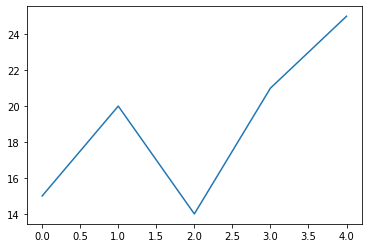

In [6]:
#plot a graph to check the service attended

plt.plot(churchdata["Service_Attended"])

from the graph above, there was a rapid growth in the number of attendance. all of a sudden the church appear to experience a drastic drop in attendance and suddenly picked up to rise again.

Limitation:
the data set is limited to lots of information that would aid in analysing and infering why there was a declination in attendance, the season that the fall occured and why the sudden rise or growth. This would help to advice the church and make a decision on how best to keep the number increasing. There is no much data set to work on.

In [7]:
churchdata

,First_Name,Last_Name,Worker_Status,House_Hold_Number,Service_Attended
0,Daniel,Johnson,worker,5,15
1,Blessing,Madu,worker,3,20
2,Makanjuola,Adekunmi,worker,2,14
3,John,James,Non worker,6,21
4,Jeremiah,Akindele,worker,7,25


In [27]:
# drop some columns
data = churchdata[['Worker_Status','House_Hold_Number','Service_Attended']]


In [28]:
data

,Worker_Status,House_Hold_Number,Service_Attended
0,worker,5,15
1,worker,3,20
2,worker,2,14
3,Non worker,6,21
4,worker,7,25


from this table above, we observed that both the working class and non worker has high level of attendance

In [10]:
data['Worker_Status'].value_counts() 

worker        4
Non worker    1
Name: Worker_Status, dtype: int64

To do some visualizations on church data set

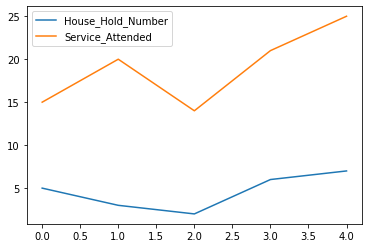

In [11]:
churchdata.plot();# this gives only the graph of the numerical values


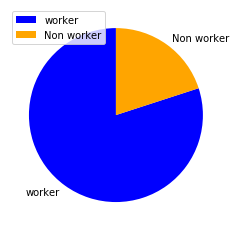

In [12]:
plt.pie(churchdata['Worker_Status']. value_counts(),
       labels=churchdata['Worker_Status'].value_counts(). index,
       colors=['blue', 'orange'], startangle =90
       )
plt.legend();
       


this pie chart above represents the worker status which are worker and non workers

In [13]:
# subset the data to only include workers
data_worker = data[data['Worker_Status'] == 'worker']
data_worker.head()

,Worker_Status,House_Hold_Number,Service_Attended
0,worker,5,15
1,worker,3,20
2,worker,2,14
4,worker,7,25


# Use linear regresssion to predict the number of times household number 4 attended church service

In [36]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [46]:

#new_data = churchdata(['House_Hold_Number'],['Service_Attended'])
#new_data
new_data= data.drop('Worker_Status',axis='columns')
new_data

,House_Hold_Number,Service_Attended
0,5,15
1,3,20
2,2,14
3,6,21
4,7,25


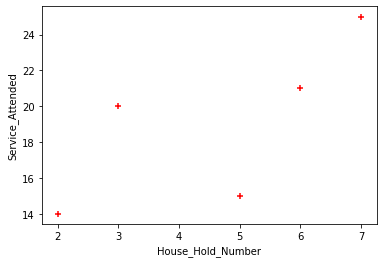

In [47]:
%matplotlib inline
plt.xlabel('House_Hold_Number')
plt.ylabel('Service_Attended')
plt.scatter(data.House_Hold_Number,data.Service_Attended,color='red',marker='+')

In [59]:
df1= new_data.drop('Service_Attended',axis='columns')
df1

,House_Hold_Number
0,5
1,3
2,2
3,6
4,7


In [61]:
attendance= new_data['Service_Attended']
attendance


0    15
1    20
2    14
3    21
4    25
Name: Service_Attended, dtype: int64

In [62]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(df1,attendance)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
reg.predict([[4]])


array([18.05813953])

In [80]:
reg.coef_


array([1.56976744])

In [81]:
reg.intercept_


11.779069767441863

#**Y = m * X + b 
y = m*x+b
y

In [82]:
4*1.56976744+11.779069767441863

18.058139527441863

from the prediction using linear regression, house hold number 4 is predicted to have attended 18 church services 